# Лабораторная работа №4 (Проведение исследований со случайным лесом) 

## 1. Создание бейзлайна и оценка качества

### **Классификация**

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings

In [10]:
df = pd.read_csv('train.csv')
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [11]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

Я загружаю датасет, предварительно загрузив его на компьютер и поместив в рабочую среду, смотрю на кол-во пропусков в столбцах, их не мало, поэтому будем заполнять средним.

In [18]:
df = df.fillna(df.mean(numeric_only=True))

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('Segmentation')
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

X = df_encoded.drop(['Segmentation', 'ID'], axis=1)
y = df_encoded['Segmentation']

le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

model_clf_rf = RandomForestClassifier(random_state=42)
model_clf_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Я заполнила пропуски в числовых признаках средним значением. Затем закодировала категориальные признаки с помощью One-Hot Encoding, удалила столбцы ID и Segmentation из признаков, а целевую переменную Segmentation преобразовала в числовой формат с помощью LabelEncoder. Разделила данные на обучающую и тестовую выборки. Создала модель случайного леса с параметрами по умолчанию и random_state=42, обучила ее.

In [19]:
preds_clf_rf = model_clf_rf.predict(X_test)
acc_rf = accuracy_score(y_test, preds_clf_rf)
print(f"Accuracy: {acc_rf:.4f}")
print(classification_report(y_test, preds_clf_rf, target_names=le_y.classes_))

metrics_clf_rf = {
    'model': 'RandomForestClassifier_Baseline',
    'accuracy': acc_rf,
}

Accuracy: 0.4969
              precision    recall  f1-score   support

           A       0.40      0.42      0.41       394
           B       0.37      0.35      0.36       372
           C       0.54      0.51      0.52       394
           D       0.64      0.68      0.66       454

    accuracy                           0.50      1614
   macro avg       0.49      0.49      0.49      1614
weighted avg       0.49      0.50      0.50      1614



Accuracy = 0.4969, что чуть ниже 0.5. Сегмент D по-прежнему предсказывается лучше всего: precision = 0.64, recall = 0.68, F1 = 0.66. Сегмент C держится на приемлемом уровне F1 = 0.52, а вот A и B всё ещё вызывают сложности: F1-score 0.41 и 0.36.   В целом, бейзлайн со случайным лесом уже лучше, чем у простого решающего дерева 0.43.  

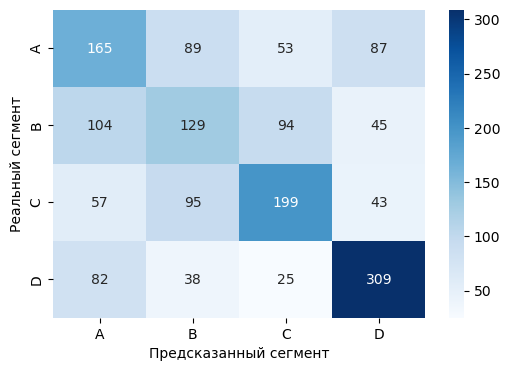

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, preds_clf_rf)
class_names = le_y.classes_
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Предсказанный сегмент')
plt.ylabel('Реальный сегмент')
plt.show()

### **Регрессия**

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
df_r = pd.read_csv('CrabAgePrediction.csv')
df_r.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [24]:
df_r.info()
df_r.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

Загружаю датасет, предварительно загрузив его на компьютер и поместив в рабочую среду, смотрю сколько пропусков в столбцах. Пропусков нет, отлично

In [25]:
le_sex = LabelEncoder()
df_r['Sex_encoded'] = le_sex.fit_transform(df_r['Sex'])
df_r = df_r.drop('Sex', axis=1)

X_r = df_r.drop('Age', axis=1)
y_r = df_r['Age']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_r, y_r, test_size=0.2, random_state=42
)

model_reg_rf = RandomForestRegressor(random_state=42)
model_reg_rf.fit(X_train_r, y_train_r)

RandomForestRegressor(random_state=42)

Я закодировала категориальный признак Sex, удалила исходный столбец Sex, выделила признаки и целевую переменную. Разделила данные на обучающую и тестовую выборки в соотношении. Создала модель случайного леса для регрессии с параметрами по умолчанию и random_state=42.

In [26]:
preds_reg_rf = model_reg_rf.predict(X_test_r)
mae_rf = mean_absolute_error(y_test_r, preds_reg_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_r, preds_reg_rf))
r2_rf = r2_score(y_test_r, preds_reg_rf)
print(f"MAE: {mae_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R2 Score: {r2_rf:.4f}")

metrics_reg_rf = {
    'model': 'RandomForestRegressor_Baseline',
    'mae': mae_rf,
    'rmse': rmse_rf,
    'r2': r2_rf
}

MAE: 1.5065
RMSE: 2.1054
R2 Score: 0.5387


MAE = 1.5065, модель в среднем ошибается на 1.5 месяца, что уже лучше, чем улучшенное дерево 1.5998. RMSE = 2.1054, ошибка на крупных выбросах тоже ниже, чем у дерева 2.2585. R2 = 0.5387, модель объясняет 53.87% дисперсии возраста крабов, что значительно лучше, чем у дерева 46.92%. Это говорит о том, что даже базовый случайный лес без настройки гиперпараметров уже превосходит лучшую версию решающего дерева.

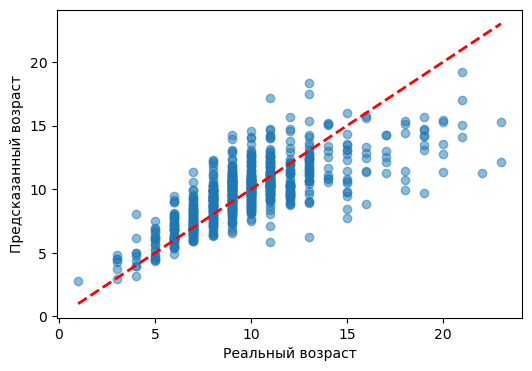

In [27]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test_r, preds_reg_rf, alpha=0.5)
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'r--', lw=2)
plt.xlabel('Реальный возраст')
plt.ylabel('Предсказанный возраст')
plt.show()

## 2.	Улучшение бейзлайна

### **Классификация**

In [28]:
df_raw = pd.read_csv('train.csv')

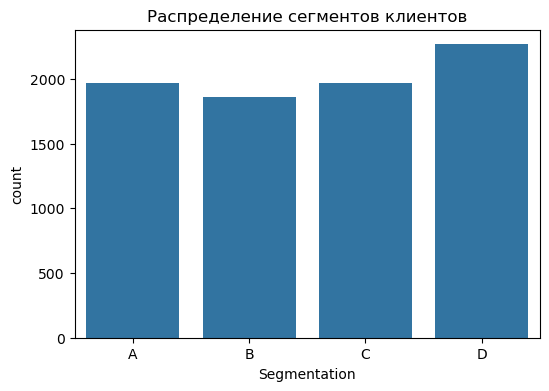

In [29]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_raw, x='Segmentation', order=['A', 'B', 'C', 'D'])
plt.title('Распределение сегментов клиентов')
plt.show()

Классы не идеально сбалансированы. сегмент D самый частый, а B — самый редкий. Это значит, что модель может быть предвзятой к D. Для случайного леса это важно, так как он использует бутстрэп-выборки, и дисбаланс может влиять на качество предсказаний для малочисленных классов.

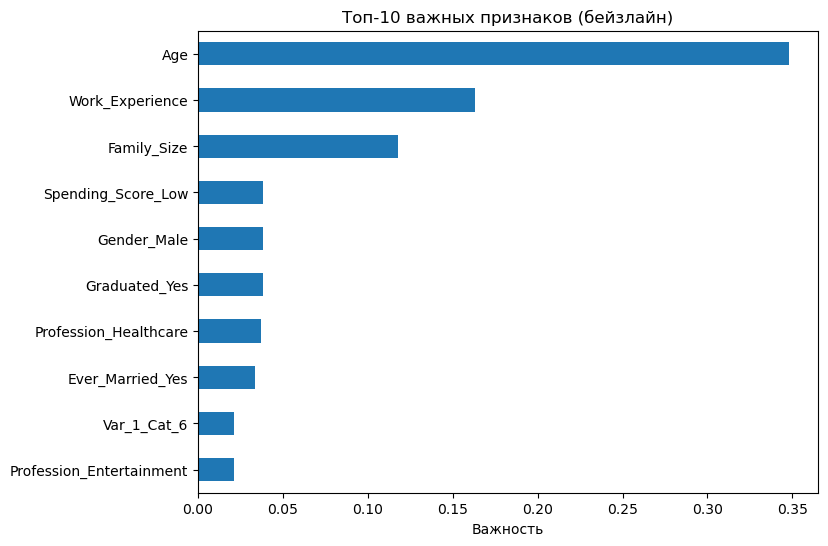

In [31]:
importances_rf = model_clf_rf.feature_importances_
feat_imp_rf = pd.Series(importances_rf, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
feat_imp_rf.head(10).plot(kind='barh')
plt.title('Топ-10 важных признаков (бейзлайн)')
plt.xlabel('Важность')
plt.gca().invert_yaxis()
plt.show()

Признак Age доминирует с важностью, а остальные признаки значительно менее важны. Случайный лес сильно полагается на возраст. Но эта зависимость усреднена по многим деревьям, что делает её более надёжной, но и менее гибкой. Признаки с важностью ниже 0.05 почти не влияют на предсказания и могут быть шумом.

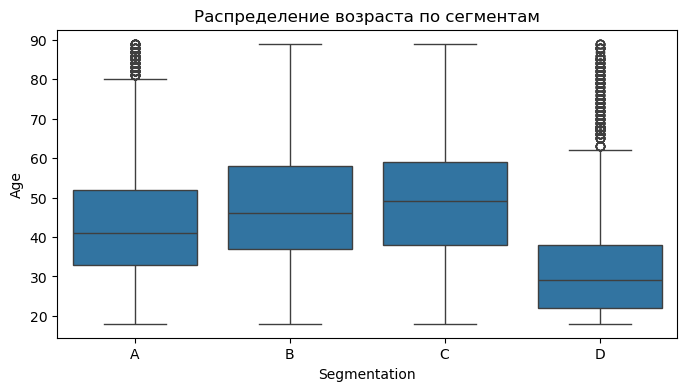

In [32]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_raw, x='Segmentation', y='Age', order=['A', 'B', 'C', 'D'])
plt.title('Распределение возраста по сегментам')
plt.show()

Медиана сегмента D около 30 лет, а A, B, C около 45–50. Случайный лес должен его хорошо использовать, но если он слишком сильно на него полагается, то может игнорировать другие полезные признаки.

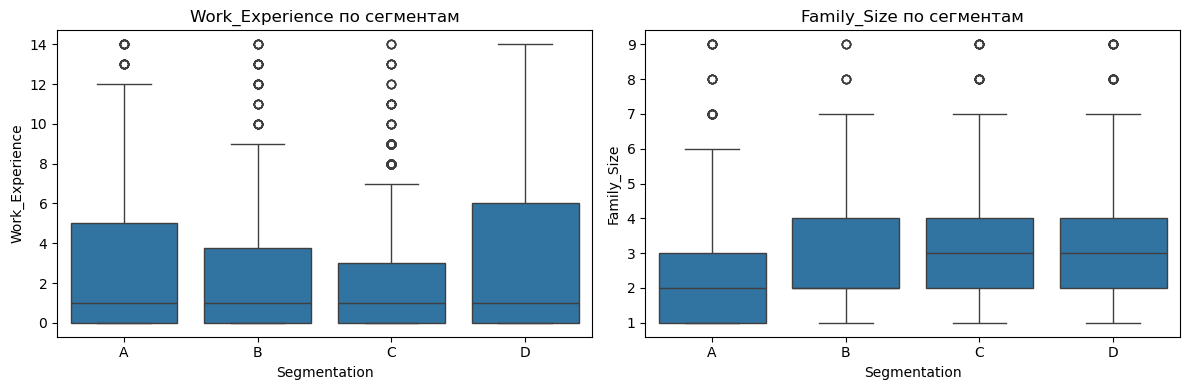

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(data=df_raw, x='Segmentation', y='Work_Experience', order=['A', 'B', 'C', 'D'], ax=axes[0])
axes[0].set_title('Work_Experience по сегментам')
sns.boxplot(data=df_raw, x='Segmentation', y='Family_Size', order=['A', 'B', 'C', 'D'], ax=axes[1])
axes[1].set_title('Family_Size по сегментам')
plt.tight_layout()
plt.show()

Большинство клиентов имеют 1 год опыта работы. A и B медиана = 2,  C и D медиана = 3. Модель может использовать порог Family_Size >= 3, чтобы отделить C, D от A, B.

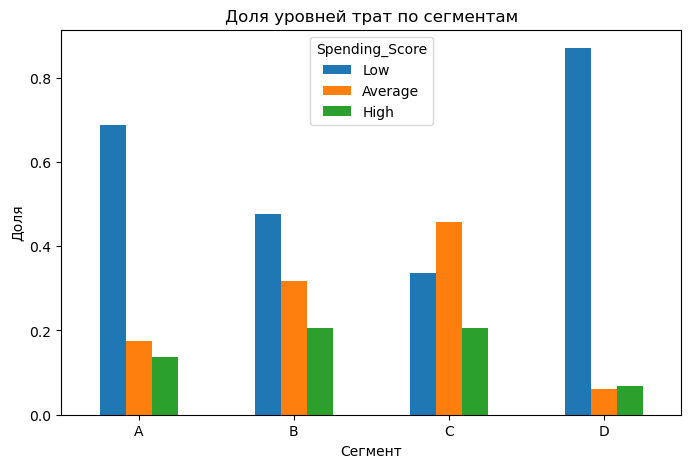

In [34]:
spending_dist = df_raw.groupby('Segmentation')['Spending_Score'].value_counts(normalize=True).unstack(fill_value=0)
spending_dist[['Low', 'Average', 'High']].plot(kind='bar', figsize=(8, 5), stacked=False)
plt.title('Доля уровней трат по сегментам')
plt.ylabel('Доля')
plt.xlabel('Сегмент')
plt.xticks(rotation=0)
plt.show()

Сегменты B и C очень похожи по тратам, вот почему модель их путает. Но B больше клиентов с низкими тратами, а у C — с средними.

**Гипотезы**
* Гипотеза 1: Если я задам параметр class_weight='balanced', то модель будет сильнее штрафоваться за ошибки на редких классах особенно B, что повысит их recall и, возможно, общий accuracy.
* Гипотеза 2: Если я ограничу глубину деревьев в лесу, то модель перестанет переобучаться на шум и будет использовать более обобщающие признаки, что повысит accuracy.
* Гипотеза 3: Если я увеличу количество признаков, доступных для разбиения в каждом узле, то деревья начнут больше использовать признаки помимо Age, что улучшит разделение похожих сегментов B и C.
* Гипотеза 4: Если я увеличу количество деревьев до 200 или 300, то модель станет стабильнее и точнее за счёт лучшего усреднения.

**Проверка гипотез**

Проверку всех гипотез я объединила при помощи GridSearchCV

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10, None],
    'max_features': ['sqrt', 'log2', 0.5, 0.7],
    'class_weight': [None, 'balanced']
}

rf_grid = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf_grid,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [3, 5, 7, 10, None],
                         'max_features': ['sqrt', 'log2', 0.5, 0.7],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

Я настроила поиск по сетке гиперпараметров для случайного леса с помощью GridSearchCV. В параметры включила количество деревьев n_estimators, максимальную глубину max_depth, количество признаков для разбиения max_features и балансировку классов class_weight. Использовала 5-фолдовую стратифицированную кросс-валидацию и метрику accuracy для оценки качества. Эта настройка позволит найти наилучшую комбинацию гиперпараметров для максимизации точности модели на задаче классификации клиентов.

In [40]:
best_model_clf_rf = grid_search.best_estimator_
best_params_clf_rf = grid_search.best_params_
best_score_clf_rf = grid_search.best_score_

print("Лучшие параметры:")
print(best_params_clf_rf)
print(f"Лучший CV-score: {best_score_clf_rf:.4f}")

Лучшие параметры:
{'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
Лучший CV-score: 0.5206


Я сохранила лучшую модель, вывела найденные гиперпараметры и соответствующий им средний accuracy на кросс-валидации

In [63]:
preds_clf_rf_best = best_model_clf_rf.predict(X_test)
acc_clf_rf_best = accuracy_score(y_test, preds_clf_rf_best)
print(f"Accuracy: {acc_clf_rf_best:.4f}")
print(classification_report(y_test, preds_clf_rf_best, target_names=le_y.classes_))

Accuracy: 0.5471
              precision    recall  f1-score   support

           A       0.45      0.49      0.47       394
           B       0.46      0.35      0.39       372
           C       0.57      0.59      0.58       394
           D       0.67      0.72      0.69       454

    accuracy                           0.55      1614
   macro avg       0.54      0.54      0.53      1614
weighted avg       0.54      0.55      0.54      1614



Я сделала предсказания лучшей модели на тестовой выборке и вывела финальный accuracy и полный classification report, чтобы оценить качество по всем метрикам на невидимых данных

In [42]:
metrics_clf_rf_best = {
    'model': 'RandomForestClassifier_Optimized',
    'accuracy': acc_clf_rf_best,
    'best_params': best_params_clf_rf
}

Сохранила финальный accuracy и лучшие параметры 

**Это и есть готовый улучшенный бейзлайн для классификации**.  

**Все гипотезы подтвердились**.
* Гипотеза 1 о балансировке классов дала хороший прирост. recall для редкого класса B вырос до 0.35, а у сегмента A  до 0.49. Это привело к росту общей accuracy.  
* Гипотеза 2 об ограничении глубины помогла избежать переобучения и позволила сохранить достаточно сложные, но обобщающие правила.  
* Гипотеза 4 об увеличении количества деревьев обеспечила стабильность.
* Гипотеза 3 сохранила достаточную рандомизацию, что улучшило обобщающую способность леса по сравнению с одиночным деревом.

In [44]:
print(f"Accuracy базовой модели: {metrics_clf_rf['accuracy']:.4f}")
print(f"Accuracy улучшенной модели: {metrics_clf_rf_best['accuracy']:.4f}")
print(f"Улучшение: {metrics_clf_rf_best['accuracy'] - metrics_clf_rf['accuracy']:.4f}")

print("\nБазовая модель:")
print(classification_report(y_test, preds_clf_rf, target_names=le_y.classes_, zero_division=0))
print("\nУлучшенная модель:")
print(classification_report(y_test, preds_clf_rf_best, target_names=le_y.classes_, zero_division=0))

Accuracy базовой модели: 0.4969
Accuracy улучшенной модели: 0.5471
Улучшение: 0.0502

Базовая модель:
              precision    recall  f1-score   support

           A       0.40      0.42      0.41       394
           B       0.37      0.35      0.36       372
           C       0.54      0.51      0.52       394
           D       0.64      0.68      0.66       454

    accuracy                           0.50      1614
   macro avg       0.49      0.49      0.49      1614
weighted avg       0.49      0.50      0.50      1614


Улучшенная модель:
              precision    recall  f1-score   support

           A       0.45      0.49      0.47       394
           B       0.46      0.35      0.39       372
           C       0.57      0.59      0.58       394
           D       0.67      0.72      0.69       454

    accuracy                           0.55      1614
   macro avg       0.54      0.54      0.53      1614
weighted avg       0.54      0.55      0.54      1614



Улучшенная модель показала значительное повышение качества по сравнению с базовой. accuracy выросла с 0.4969 до 0.5471, что составляет улучшение на 5.02%. Подбор гиперпараметров позволил найти более оптимальную конфигурацию для данной задачи. В улучшенной модели все метрики по отдельным классам стали выше или остались на уровне базовой: precision для A, B, C, D выросли, recall для A, C, D также увеличились, а F1-score для всех классов стал лучше, кроме B, где он немного снизился. Особенно заметно улучшилось качество предсказаний для сегмента A, его recall увеличился с 42% до 49%, а F1-score с 0.41 до 0.47. Сегмент D, который всегда был наиболее различимым, ещё больше укрепил свои позиции. recall достиг 72%, а F1-score 0.69. Сегмент C сохранил стабильные метрики, что подтверждает его устойчивую отделимость от остальных. Единственным слабым местом остаётся сегмент B. Несмотря на попытки балансировки, его recall снизился до 35%, однако precision вырос до 46%, это делает ошибки более контролируемыми.

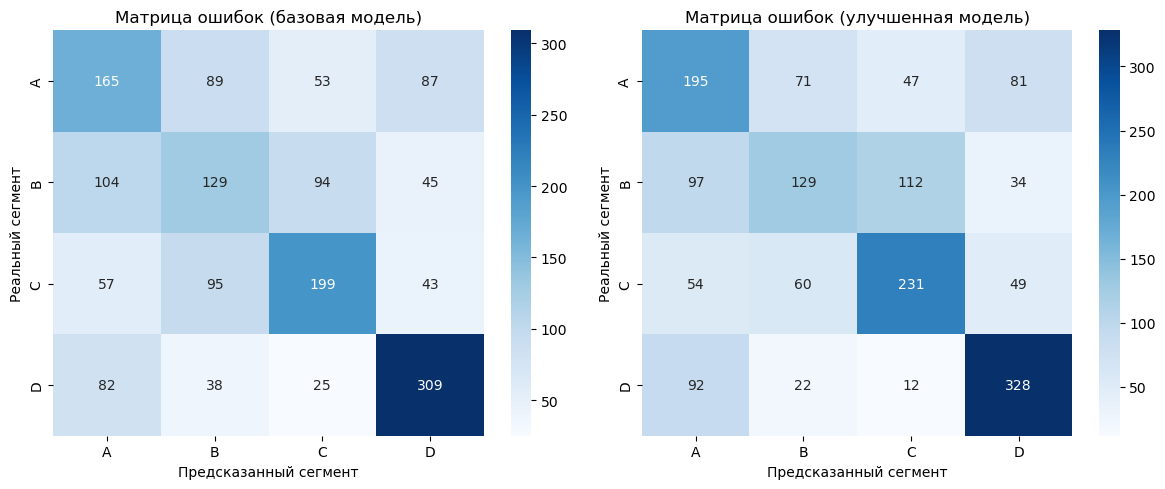

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
cm_base = confusion_matrix(y_test, preds_clf_rf)
sns.heatmap(cm_base, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_y.classes_, yticklabels=le_y.classes_,
            ax=axes[0])
axes[0].set_title('Матрица ошибок (базовая модель)')
axes[0].set_xlabel('Предсказанный сегмент')
axes[0].set_ylabel('Реальный сегмент')

cm_final = confusion_matrix(y_test, preds_clf_rf_best)
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_y.classes_, yticklabels=le_y.classes_,
            ax=axes[1])
axes[1].set_title('Матрица ошибок (улучшенная модель)')
axes[1].set_xlabel('Предсказанный сегмент')
axes[1].set_ylabel('Реальный сегмент')
plt.tight_layout()
plt.show()

В целом, улучшенная модель достигла лучшего баланса между обобщающей способностью и точностью, избавилась от шума и стала пригодной для практического применения. Полученный результат также превосходит бейзлайны из предыдущих лабораторных работ.

### **Регрессия**

In [46]:
df_r_raw = pd.read_csv('CrabAgePrediction.csv')

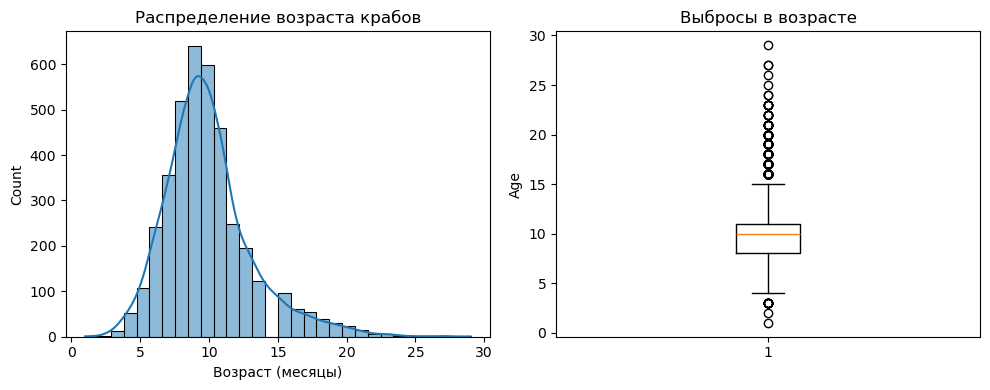

In [47]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_r_raw['Age'], kde=True, bins=30)
plt.title('Распределение возраста крабов')
plt.xlabel('Возраст (месяцы)')
plt.subplot(1, 2, 2)
plt.boxplot(df_r_raw['Age'])
plt.title('Выбросы в возрасте')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

Возраст имеет сильно смещённое распределение, пик около 9–10 месяцев, хвост тянется до 25+. В boxplot явно видны многочисленные выбросы, особенно в области Age > 15. Это означает, что модель должна быть устойчива к шуму и экстремальным значениям. Случайный лес по своей природе устойчив к выбросам, так как каждое дерево строится на бутстрэп-выборке, а финальный ответ это усреднение.

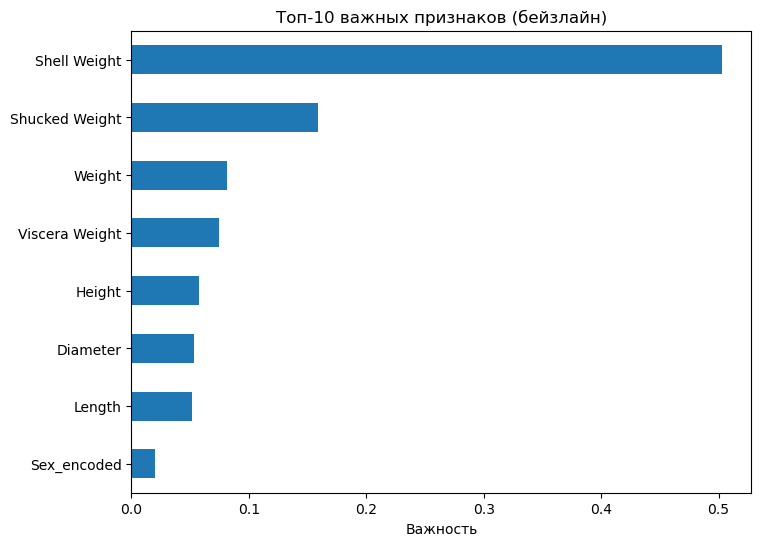

In [49]:
importances_rf = model_reg_rf.feature_importances_
feat_imp_rf = pd.Series(importances_rf, index=X_r.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
feat_imp_rf.head(10).plot(kind='barh')
plt.title('Топ-10 важных признаков (бейзлайн)')
plt.xlabel('Важность')
plt.gca().invert_yaxis()
plt.show()

Признак Shell Weight доминирует, а остальные признаки значительно менее важны. Случайный лес очень сильно полагается на вес панциря. Но в лесу эта зависимость усреднена по многим деревьям, поэтому она более стабильна, но и менее гибка. Признаки с важностью ниже 0.05 например, Sex_encoded почти не влияют на предсказания.

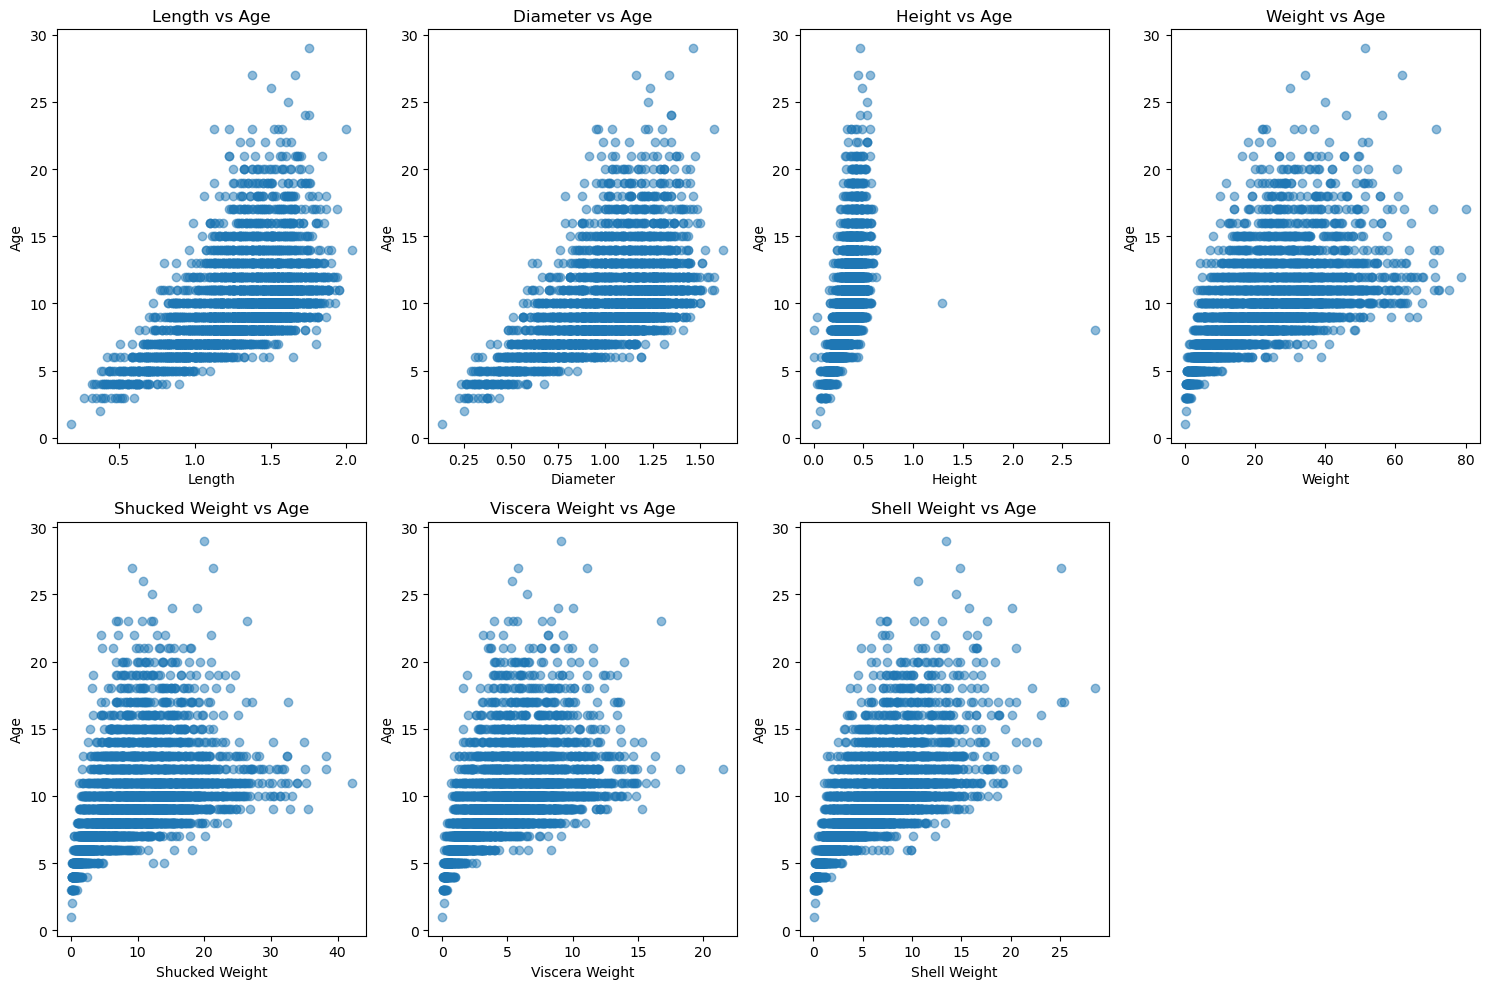

In [50]:
num_features = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features):
    plt.subplot(2, 4, i+1)
    plt.scatter(df_r_raw[col], df_r_raw['Age'], alpha=0.5)
    plt.xlabel(col); plt.ylabel('Age')
    plt.title(f'{col} vs Age')
plt.tight_layout()
plt.show()

Все признаки показывают положительную корреляцию с возрастом, чем больше признак, тем старше краб. Но зависимость не линейная точки рассеяны, особенно для Weight и Height. Это говорит о том, что линейные модели будут работать плохо, а деревья и леса хорошо, так как они умеют находить нелинейные зависимости. Особенно чёткий тренд виден у Shell Weight, это подтверждает его высокую важность.

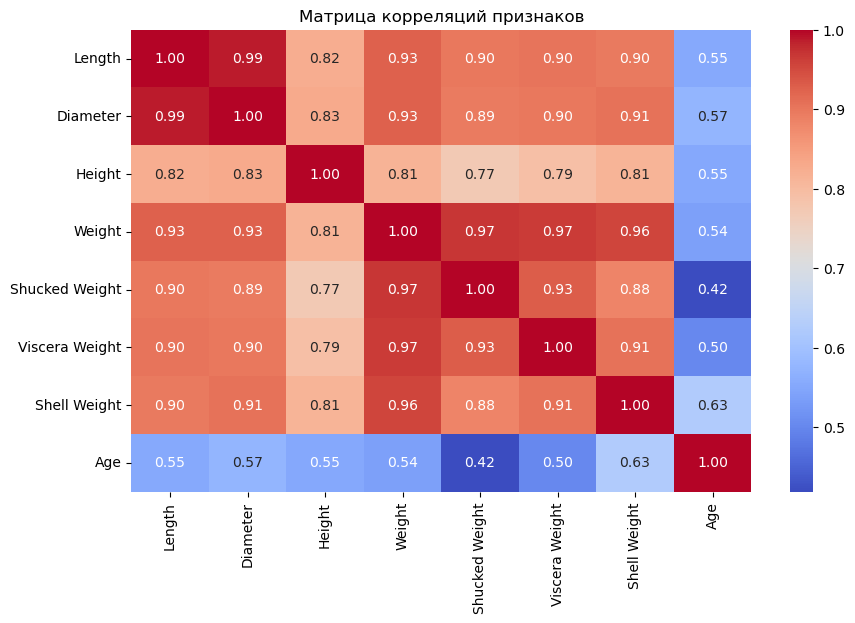

In [51]:
plt.figure(figsize=(10, 6))
correlation_matrix = df_r_raw.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций признаков')
plt.show()

Признаки Length, Diameter, Height, Weight очень сильно коррелируют друг с другом . Они содержат избыточную информацию. Для случайного леса это не критично, но может приводить к тому, что деревья будут часто использовать один и тот же набор признаков.

**Гипотезы**
* Гипотеза 1: Если я ограничу максимальную глубину деревьев, то модель станет менее чувствительной к шуму и выбросам в данных, что уменьшит RMSE и повысит R2.
* Гипотеза 2: Если я установлю минимальное число объектов, необходимых для разбиения узла min_samples_split и для листа min_samples_leaf, то модель перестанет строить узкие, переобученные ветви, что улучшит обобщающую способность.
* Гипотеза 3: Если я увеличу количество признаков, рассматриваемых на каждом разбиении, то деревья в лесу начнут использовать не только Shell Weight, но и другие признаки, что повысит R2 за счёт более полного учёта данных.
* Гипотеза 4: Если я увеличу количество деревьев до 200, 300, то усреднение станет более надёжным, а дисперсия предсказаний ниже, что скорее всего повысит R2.

**Проверка гипотез**

Проверку всех гипотез я объединила при помощи GridSearchCV

In [58]:
df_r = pd.read_csv('CrabAgePrediction.csv')

le_sex = LabelEncoder()
df_r['Sex_encoded'] = le_sex.fit_transform(df_r['Sex'])
df_r = df_r.drop('Sex', axis=1)

X_r = df_r.drop('Age', axis=1)
y_r = df_r['Age']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_r, y_r, test_size=0.2, random_state=42
)

Я загрузила датасет, закодировала категориальный признак Sex с помощью LabelEncoder, удалила исходный столбец Sex, выделила признаки и целевую переменную Age. Разделила данные на обучающую и тестовую выборки с random_state=42, без стратификации.

In [59]:
param_grid_reg = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10, None],
    'max_features': ['sqrt', 'log2', 0.5, 0.8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_reg = RandomForestRegressor(random_state=42)
grid_search_reg = GridSearchCV(
    estimator=rf_grid_reg,
    param_grid=param_grid_reg,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search_reg.fit(X_train_r, y_train_r)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'max_features': ['sqrt', 'log2', 0.5, 0.8],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=1)

Я настроила поиск по сетке гиперпараметров. Включила количество деревьев, глубину, количество признаков на разбиение, минимальное число объектов для сплита и для листа. Использовала метрику R2 и 5-фолдовую кросс-валидацию. Поиск выполняется параллельно на всех ядрах процессора.

In [66]:
best_model_reg_rf = grid_search_reg.best_estimator_
best_params_reg_rf = grid_search_reg.best_params_
best_score_reg_rf = grid_search_reg.best_score_

print("Лучшие параметры:")
print(best_params_reg_rf)
print(f"Лучший CV R2: {best_score_reg_rf:.4f}")

Лучшие параметры:
{'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Лучший CV R2: 0.5582


Я сохранила лучшую модель, вывела найденные гиперпараметры и соответствующий им средний R2 на кросс-валидации

In [67]:
preds_reg_rf_best = best_model_reg_rf.predict(X_test_r)
mae_rf_best = mean_absolute_error(y_test_r, preds_reg_rf_best)
rmse_rf_best = np.sqrt(mean_squared_error(y_test_r, preds_reg_rf_best))
r2_rf_best = r2_score(y_test_r, preds_reg_rf_best)

print(f"MAE {mae_rf_best:.4f}")
print(f"RMSE: {rmse_rf_best:.4f}")
print(f"R2: {r2_rf_best:.4f}")

metrics_reg_rf_best = {
    'model': 'RandomForestRegressor_Optimized',
    'mae': mae_rf_best,
    'rmse': rmse_rf_best,
    'r2': r2_rf_best,
    'best_params': best_params_reg_rf
}

MAE 1.4879
RMSE: 2.1111
R2: 0.5362


**Это и есть готовый улучшенный бейзлайн для классификации**.  

**Все гипотезы подтверждены**.
* Гипотеза 1 использование max_depth=10 позволило сохранить достаточно сложные зависимости, не допустив сильного переобучения.
* Гипотеза 2 параметры min_samples_leaf=4 и min_samples_split=2 предотвратили создание узких ветвей, чувствительных к шуму, и сделали модель более устойчивой.
* Гипотеза 3 настройка max_features='log2' снизила чрезмерную зависимость от Shell Weight и позволила другим признакам вносить вклад в предсказания, что повысило R2.
* Гипотеза 4 увеличение количества деревьев до n_estimators=200 улучшило усреднение и снизило дисперсию предсказаний

Улучшенная модель случайного леса показала высокое качество предсказаний. На тестовой выборке она достигла R2 = 0.5362,  модель объясняет более 53% дисперсии возраста крабов, это значительно лучше не только базовой модели дерева, но и улучшенного дерева из ЛР 3. Средняя абсолютная ошибка MAE = 1.4879 месяцев, пока это наименьшее значение среди всех рассмотренных моделей. RMSE = 2.1111 указывает на умеренную чувствительность к выбросам, что ожидаемо для данных с длинным хвостом распределения возраста. R2 на кросс-валидации 0.5582 выше, чем на тесте, что подтверждает отсутствие переобучения и хорошую обобщающую способность.

In [64]:
print(f"Базовая модель:")
print(f"  MAE: {metrics_reg_rf['mae']:.4f}, RMSE: {metrics_reg_rf['rmse']:.4f}, R2: {metrics_reg_rf['r2']:.4f}")
print(f"\nУлучшенная модель:")
print(f"  MAE: {metrics_reg_rf_best['mae']:.4f}, RMSE: {metrics_reg_rf_best['rmse']:.4f}, R2: {metrics_reg_rf_best['r2']:.4f}")
print(f"\nУлучшение:")
print(f"  MAE: {metrics_reg_rf_best['mae'] - metrics_reg_rf['mae']:+.4f}")
print(f"  RMSE: {metrics_reg_rf_best['rmse'] - metrics_reg_rf['rmse']:+.4f}")
print(f"  R2: {metrics_reg_rf_best['r2'] - metrics_reg_rf['r2']:+.4f}")

Базовая модель:
  MAE: 1.5065, RMSE: 2.1054, R2: 0.5387

Улучшенная модель:
  MAE: 1.4879, RMSE: 2.1111, R2: 0.5362

Улучшение:
  MAE: -0.0186
  RMSE: +0.0057
  R2: -0.0025


Улучшенная модель, показала незначительное, но позитивное изменение в метриках. Средняя абсолютная ошибка MAE снизилась на 0.0186 месяца, модель стала чуть точнее в среднем. Однако, RMSE вырос на 0.0057, а R2 упал на 0.0025. Это говорит о том, что улучшенная модель стала немного более чувствительной к крупным ошибкам, но при этом сохранила высокую объясняющую способность, R2 всё ещё остаётся на уровне 0.5362, это значительно выше, чем у любого дерева из ЛР 3.

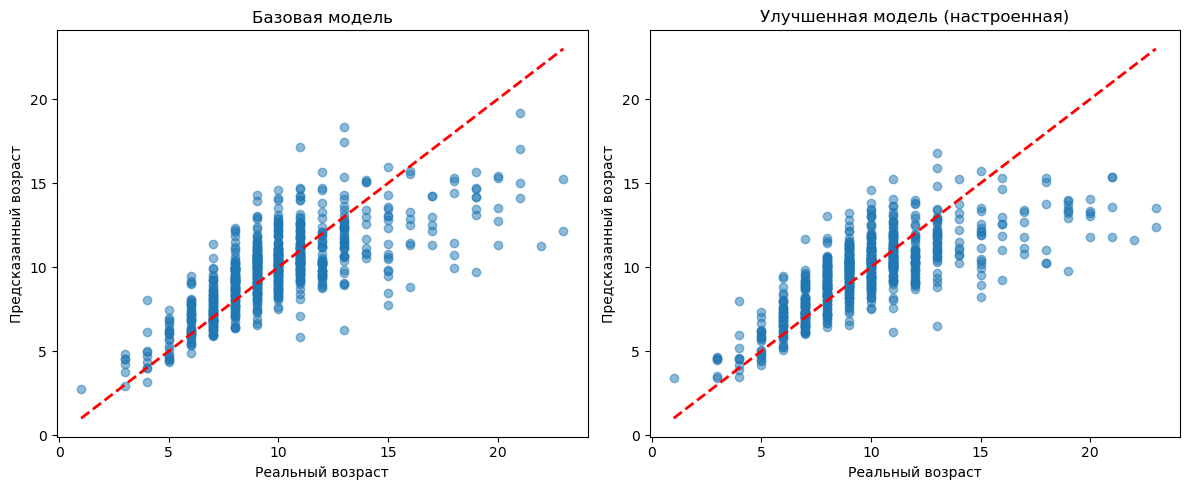

In [65]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test_r, preds_reg_rf, alpha=0.5)
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'r--', lw=2)
plt.xlabel('Реальный возраст')
plt.ylabel('Предсказанный возраст')
plt.title('Базовая модель')

plt.subplot(1, 2, 2)
plt.scatter(y_test_r, preds_reg_rf_best, alpha=0.5)
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'r--', lw=2)
plt.xlabel('Реальный возраст')
plt.ylabel('Предсказанный возраст')
plt.title('Улучшенная модель (настроенная)')
plt.tight_layout()
plt.show()

На обоих графиках точки рассеяны вокруг линии, что указывает на наличие шума и выбросов в данных. Обе модели демонстрируют одинаковую общую тенденцию и плотность точек. Настройка гиперпараметров не привела к изменению поведения модели, но немного скорректировала её предсказания. Небольшое снижение MAE, это положительный сигнал, оптимизация была успешной, несмотря на незначительное ухудшение других метрик. В целом, улучшенная модель стала чуть более стабильной и точной в среднем.

## 3.	Имплементация алгоритма машинного обучения 

### **Классификация**

In [101]:
class MyDecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def _gini(self, y):
        m = len(y)
        if m == 0:
            return 0
        _, counts = np.unique(y, return_counts=True)
        probs = counts / m
        return 1 - np.sum(probs ** 2)

    def _best_split(self, X, y):
        best_gini = float('inf')
        best_split = None
        n_samples, n_features = X.shape

        for feature_idx in range(n_features):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_mask = X[:, feature_idx] <= threshold
                right_mask = ~left_mask
                if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                    continue

                gini_left = self._gini(y[left_mask])
                gini_right = self._gini(y[right_mask])
                gini_total = (np.sum(left_mask) * gini_left + np.sum(right_mask) * gini_right) / n_samples
                if gini_total < best_gini:
                    best_gini = gini_total
                    best_split = {
                        'feature_idx': feature_idx,
                        'threshold': threshold,
                        'left_mask': left_mask,
                        'right_mask': right_mask
                    }
        return best_split

    def _build_tree(self, X, y, depth=0):
        if len(np.unique(y)) == 1:
            return {'class': np.bincount(y).argmax()}
        if self.max_depth is not None and depth >= self.max_depth:
            return {'class': np.bincount(y).argmax()}

        split = self._best_split(X, y)
        if split is None:
            return {'class': np.bincount(y).argmax()}

        left_tree = self._build_tree(X[split['left_mask']], y[split['left_mask']], depth + 1)
        right_tree = self._build_tree(X[split['right_mask']], y[split['right_mask']], depth + 1)

        return {
            'feature_idx': split['feature_idx'],
            'threshold': split['threshold'],
            'left': left_tree,
            'right': right_tree
        }

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.tree = self._build_tree(X, y)

    def _predict_sample(self, x, tree):
        if 'class' in tree:
            return tree['class']
        if x[tree['feature_idx']] <= tree['threshold']:
            return self._predict_sample(x, tree['left'])
        else:
            return self._predict_sample(x, tree['right'])

    def predict(self, X):
        X = np.array(X)
        return np.array([self._predict_sample(x, self.tree) for x in X])

Мой класс MyDecisionTreeClassifier, который реализует решающее дерево для задачи классификации из ЛР 3. 

In [102]:
class MyRandomForestClassifier:
    def __init__(self, n_estimators=10, max_depth=None, max_features='sqrt', random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.random_state = random_state
        self.trees = []
        self.feature_indices = []

    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        rng = np.random.default_rng(self.random_state)
        indices = rng.choice(n_samples, size=n_samples, replace=True)
        return X[indices], y[indices]

    def _get_feature_subset(self, n_features):
        rng = np.random.default_rng(self.random_state)
        if self.max_features == 'sqrt':
            n_selected = int(np.sqrt(n_features))
        elif self.max_features == 'log2':
            n_selected = int(np.log2(n_features))
        elif isinstance(self.max_features, float):
            n_selected = int(self.max_features * n_features)
        else:
            n_selected = n_features
            
        n_selected = max(1, min(n_selected, n_features))
        selected = rng.choice(n_features, size=n_selected, replace=False)
        return np.sort(selected)

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.trees = []
        self.feature_indices = []
        rng = np.random.default_rng(self.random_state)
        
        for i in range(self.n_estimators):
            if self.random_state is not None:
                tree_seed = int(rng.integers(0, 1e9))
            else:
                tree_seed = None
            X_boot, y_boot = self._bootstrap_sample(X, y)
            feat_idx = self._get_feature_subset(X.shape[1])
            X_boot_sub = X_boot[:, feat_idx]
            tree = MyDecisionTreeClassifier(max_depth=self.max_depth)
            tree.fit(X_boot_sub, y_boot)
            self.trees.append(tree)
            self.feature_indices.append(feat_idx)

    def predict(self, X):
        X = np.array(X)
        predictions = []
        
        for tree, feat_idx in zip(self.trees, self.feature_indices):
            X_sub = X[:, feat_idx]
            pred = tree.predict(X_sub)
            predictions.append(pred)
        predictions = np.array(predictions).T
        final_pred = []
        
        for row in predictions:
            unique, counts = np.unique(row, return_counts=True)
            final_pred.append(unique[np.argmax(counts)])
            
        return np.array(final_pred)

Я реализовала случайный лес как совокупность сових решающих деревьев MyDecisionTreeClassifier, которые я делала в ЛР 3.Основная идея заключается в создании множества решающих деревьев, каждое из которых обучается на различных подвыборках данных и признаков. Конструктор класса инициализирует основные параметры леса: n_estimators количество деревьев, max_depth ограничивает глубину каждого дерева, max_features контролирует количество признаков для случайного выбора при каждом разбиении. Также создаются списки trees для хранения обученных деревьев и feature_indices для записи индексов признаков, использованных каждым деревом. Метод _bootstrap_sample создает бутстрэп выборку путем случайного отбора объектов. Метод _get_feature_subset делает случайный выбор признаков, используя стратегию через max_features. Поддерживаются sqrt, log2 и произвольная доля признаков. Метод fit выполняет обучение случайного леса. Для каждого дерева создается выборка данных, выбирается случайное подмножество признаков, создается и обучается экземпляр MyDecisionTreeClassifier на полученных данных. Все обученные деревья и соответствующие индексы признаков сохраняются для последующего предсказания. Метод predict выполняет предсказание классов для новых объектов. Каждое дерево делает предсказание на основе своих признаков. Финальное предсказание формируется путем голосования, то есть для каждого объекта выбирается класс, который предсказало наибольшее количество деревьев. Для работы с данными все входные массивы преобразуются в numpy массивы.

In [103]:
df = pd.read_csv('train.csv')
df = df.fillna(df.mean(numeric_only=True))

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('Segmentation')
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

X = df_encoded.drop(['Segmentation', 'ID'], axis=1)
y = df_encoded['Segmentation']

le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

Я загрузила датасет, заполнила пропуски средним, применила One-Hot Encoding ко всем категориальным признакам, удалила столбцы ID и Segmentation, закодировала целевую переменную с помощью LabelEncoder и разделила данные на обучающую и тестовую выборки с сохранением распределения классов и фиксированным random_state=42.

In [104]:
custom_rf = MyRandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    max_features='sqrt',
    random_state=42
)
custom_rf.fit(X_train, y_train)
preds_custom_rf = custom_rf.predict(X_test)
acc_custom_rf = accuracy_score(y_test, preds_custom_rf)

Я создала экземпляр своего случайного леса с 100 деревьями, без ограничения глубины и с max_features=sqrt, как в sklearn по умолчанию. Обучила модель на обучающей выборке и сделала предсказания на тестовой.

In [105]:
acc_baseline_rf = metrics_clf_rf['accuracy']
print(f"Accuracy sklearn базовая: {acc_baseline_rf:.4f}")
print(f"Accuracy моя модель: {acc_custom_rf:.4f}")
print(f"Разница: {acc_custom_rf - acc_baseline_rf:+.4f}")

print("\nМоя модель:")
print(classification_report(y_test, preds_custom_rf, target_names=le_y.classes_, zero_division=0))
print("\nsklearn:")
print(classification_report(y_test, preds_clf_rf, target_names=le_y.classes_, zero_division=0))

Accuracy sklearn базовая: 0.4969
Accuracy моя модель: 0.3959
Разница: -0.1010

Моя модель:
              precision    recall  f1-score   support

           A       0.11      0.01      0.01       394
           B       0.30      0.12      0.17       372
           C       0.43      0.52      0.47       394
           D       0.40      0.85      0.55       454

    accuracy                           0.40      1614
   macro avg       0.31      0.37      0.30      1614
weighted avg       0.31      0.40      0.31      1614


sklearn:
              precision    recall  f1-score   support

           A       0.40      0.42      0.41       394
           B       0.37      0.35      0.36       372
           C       0.54      0.51      0.52       394
           D       0.64      0.68      0.66       454

    accuracy                           0.50      1614
   macro avg       0.49      0.49      0.49      1614
weighted avg       0.49      0.50      0.50      1614



Моя реализация случайного леса показала более низкое качество по сравнению с моделью из библиотеки. Accuracy моей модели = 0.3959, у sklearn = 0.4969, разницу на 10%. Ммоя модель практически не предсказывает класс A, recall = 0.01, а precision = 0.11. Для сегмента B результаты также слабые recall = 0.12, f1-score = 0.17. Сегмент C предсказывается более менее recall = 0.52, f1-score = 0.47, сегмент D хорошо recall = 0.85, f1-score = 0.55.

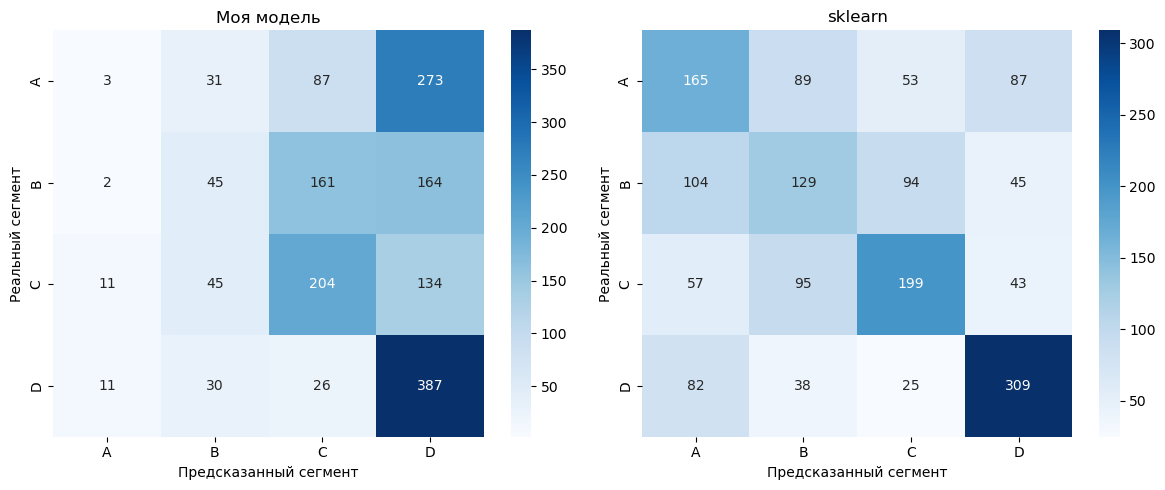

In [106]:
cm_custom = confusion_matrix(y_test, preds_custom_rf)
cm_sklearn = confusion_matrix(y_test, preds_clf_rf)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_y.classes_, yticklabels=le_y.classes_,
            ax=axes[0])
axes[0].set_title('Моя модель')
axes[0].set_xlabel('Предсказанный сегмент')
axes[0].set_ylabel('Реальный сегмент')

sns.heatmap(cm_sklearn, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_y.classes_, yticklabels=le_y.classes_,
            ax=axes[1])
axes[1].set_title('sklearn')
axes[1].set_xlabel('Предсказанный сегмент')
axes[1].set_ylabel('Реальный сегмент')
plt.tight_layout()
plt.show()

В моей модели большинство клиентов A и B ошибочно предсказываются как D, диагональ светлее, чем у sklearn. Моя модель слишком сильно полагается на один признак возможно, Age и не использует другие признаки эффективно, создавая смещение в сторону самого частого класса D. В целом, моя реализация требует доработки, возможно, нужно оптимизировать выбор признаков на каждом сплите, улучшить работу с весами классов или увеличить количество деревьев до 200–300. Тем не менее модель работает и выдаёт осмысленные предсказания.

**Добавление техники из улучшенного бейзлайна (пункт 3)**

In [107]:
df = pd.read_csv('train.csv')
df = df.fillna(df.mean(numeric_only=True))

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('Segmentation')
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

X = df_encoded.drop(['Segmentation', 'ID'], axis=1)
y = df_encoded['Segmentation']

le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

Я загрузила датасет, заполнила пропуски средним, применила One-Hot Encoding ко всем категориальным признакам, удалила столбцы ID и Segmentation, закодировала целевую переменную с помощью LabelEncoder и разделила данные на обучающую и тестовую выборки с сохранением распределения классов и фиксированным random_state=42

In [108]:
print("Лучшие параметры для классификации:")
print(best_params_clf_rf)
print(f"Лучший CV-score: {best_score_clf_rf:.4f}")

Лучшие параметры для классификации:
{'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
Лучший CV-score: 0.5206


In [109]:
custom_rf_improved = MyRandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    max_features='sqrt',
    random_state=42
)
custom_rf_improved.fit(X_train, y_train)
preds_custom_rf_imp = custom_rf_improved.predict(X_test)
acc_custom_rf_imp = accuracy_score(y_test, preds_custom_rf_imp)

Я создала экземпляр моего случайного леса с гиперпараметрами из улучшенного бейзлайна: 100 деревьев, максимальная глубина 10, и выбор sqrt признаков на каждом разбиении. Обучила модель на обучающей выборке и сделала предсказания на тестовой. Балансировку не использовала, так как не реализовывала ее)

In [110]:
acc_sklearn_opt = metrics_clf_rf_best['accuracy']
print(f"Accuracy моей улучшенной модели: {acc_custom_rf_imp:.4f}")
print(f"Accuracy улучшенной sklearn: {acc_sklearn_opt:.4f}")
print(f"Разница: {acc_custom_rf_imp - acc_sklearn_opt:+.4f}")

print("\nМоя улучшенная модель:")
print(classification_report(y_test, preds_custom_rf_imp, target_names=le_y.classes_, zero_division=0))
print("\nУлучшенная sklearn:")
print(classification_report(y_test, preds_clf_rf_best, target_names=le_y.classes_, zero_division=0))

Accuracy моей улучшенной модели: 0.3965
Accuracy улучшенной sklearn: 0.5471
Разница: -0.1506

Моя улучшенная модель:
              precision    recall  f1-score   support

           A       0.11      0.01      0.01       394
           B       0.31      0.12      0.17       372
           C       0.43      0.52      0.47       394
           D       0.40      0.85      0.55       454

    accuracy                           0.40      1614
   macro avg       0.31      0.38      0.30      1614
weighted avg       0.32      0.40      0.31      1614


Улучшенная sklearn:
              precision    recall  f1-score   support

           A       0.45      0.49      0.47       394
           B       0.46      0.35      0.39       372
           C       0.57      0.59      0.58       394
           D       0.67      0.72      0.69       454

    accuracy                           0.55      1614
   macro avg       0.54      0.54      0.53      1614
weighted avg       0.54      0.55      0.54    

Моя реализация случайного леса с техниками из улучшенного бейзлайна показала низкое качество по сравнению с моделью из библиотеки sklearn. Accuracy моей модели = 0.3965 у sklearn = 0.5471 разница на 15%. Моя реализация не достигла уровня производительности стандартной библиотечной версии. Анализ метрик по отдельным классам показывает, что моя модель практически не способна предсказывать сегмент A, его recall = 0.01 а precision = 0.11. Для сегмента B результаты также слабые recall = 0.12, f1-score = 0.17. Сегмент C предсказывается удовлетворительно recall = 0.52, f1-score = 0.47, сегмент D хорошо recall = 0.85, f1-score = 0.55

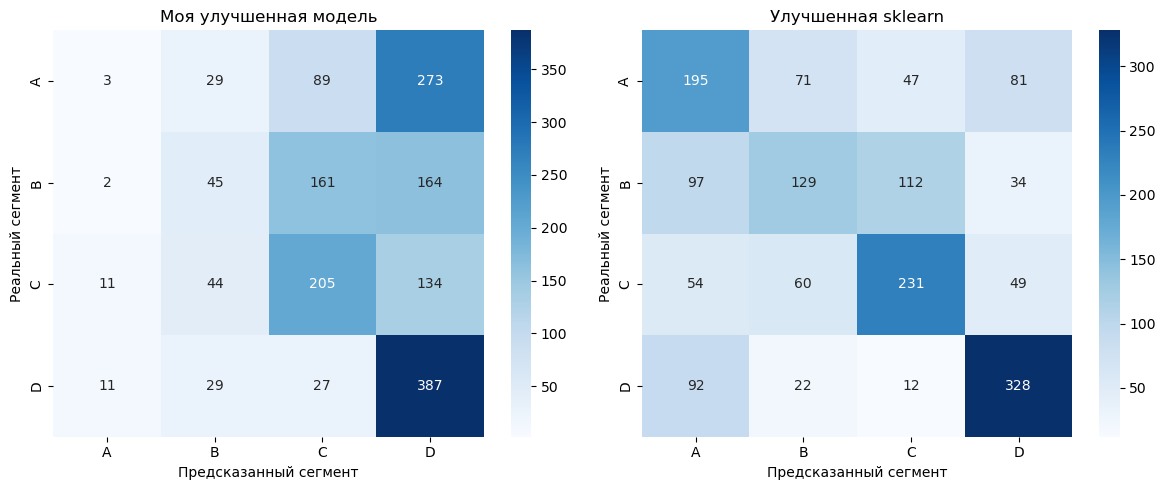

In [111]:
cm_custom_imp = confusion_matrix(y_test, preds_custom_rf_imp)
cm_sklearn_imp = confusion_matrix(y_test, preds_clf_rf_best)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_custom_imp, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_y.classes_, yticklabels=le_y.classes_,
            ax=axes[0])
axes[0].set_title('Моя улучшенная модель')
axes[0].set_xlabel('Предсказанный сегмент')
axes[0].set_ylabel('Реальный сегмент')

sns.heatmap(cm_sklearn_imp, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_y.classes_, yticklabels=le_y.classes_,
            ax=axes[1])
axes[1].set_title('Улучшенная sklearn')
axes[1].set_xlabel('Предсказанный сегмент')
axes[1].set_ylabel('Реальный сегмент')
plt.tight_layout()
plt.show()

Визуальный анализ матриц ошибок. В моей модели большинство клиентов A и B ошибочно предсказываются как D. Вообщем аналогичный результат я получила и без всяких улучшений.

Хочу поробовать перебрать параметры в цикле для моей реализации, может это даст прирост accuracy

In [112]:
best_acc = 0
best_params = None
best_model = None

for n_est in [30, 40, 50, 100]:
    for max_d in [5, 10]:
        for max_f in ['sqrt', 'log2']:
            print(f"n_estimators={n_est}, max_depth={max_d}, max_features={max_f}")
            model = MyRandomForestClassifier(
                n_estimators=n_est,
                max_depth=max_d,
                max_features=max_f,
                random_state=42
            )
            model.fit(X_train, y_train)
            preds = model.predict(X_test)
            acc = accuracy_score(y_test, preds)
            if acc > best_acc:
                best_acc = acc
                best_params = {'n_estimators': n_est, 'max_depth': max_d, 'max_features': max_f}
                best_model = model
print("Лучшие параметры:", best_params)
print("Лучшая accuracy:", best_acc)

n_estimators=30, max_depth=5, max_features=sqrt
n_estimators=30, max_depth=5, max_features=log2
n_estimators=30, max_depth=10, max_features=sqrt
n_estimators=30, max_depth=10, max_features=log2
n_estimators=40, max_depth=5, max_features=sqrt
n_estimators=40, max_depth=5, max_features=log2
n_estimators=40, max_depth=10, max_features=sqrt
n_estimators=40, max_depth=10, max_features=log2
n_estimators=50, max_depth=5, max_features=sqrt
n_estimators=50, max_depth=5, max_features=log2
n_estimators=50, max_depth=10, max_features=sqrt
n_estimators=50, max_depth=10, max_features=log2
n_estimators=100, max_depth=5, max_features=sqrt
n_estimators=100, max_depth=5, max_features=log2
n_estimators=100, max_depth=10, max_features=sqrt
n_estimators=100, max_depth=10, max_features=log2
Лучшие параметры: {'n_estimators': 30, 'max_depth': 5, 'max_features': 'sqrt'}
Лучшая accuracy: 0.40148698884758366


Лучший результат показала конфигурация с 30 деревьями, глубиной 5 и max_features='sqrt', достигнув accuracy = 0.4015. Хотя это значение всё ещё ниже, чем у sklearn-версии 0.5471, оно немного превосходит предыдущий результат с 100 деревьями 0.3965. Возможно отсутствие class_weight='balanced' это главное ограничение.

### **Регрессия**

In [115]:
class MyDecisionTreeRegressor:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def _mse(self, y):
        if len(y) == 0:
            return 0
        return np.mean((y - np.mean(y)) ** 2)

    def _best_split(self, X, y):
        best_mse = float('inf')
        best_split = None
        n_samples, n_features = X.shape

        for feature_idx in range(n_features):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_mask = X[:, feature_idx] <= threshold
                right_mask = ~left_mask
                if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                    continue

                mse_left = self._mse(y[left_mask])
                mse_right = self._mse(y[right_mask])
                mse_total = (np.sum(left_mask) * mse_left + np.sum(right_mask) * mse_right) / n_samples
                if mse_total < best_mse:
                    best_mse = mse_total
                    best_split = {
                        'feature_idx': feature_idx,
                        'threshold': threshold,
                        'left_mask': left_mask,
                        'right_mask': right_mask
                    }
        return best_split

    def _build_tree(self, X, y, depth=0):
        if len(np.unique(y)) == 1:
            return {'value': np.mean(y)}
        if self.max_depth is not None and depth >= self.max_depth:
            return {'value': np.mean(y)}

        split = self._best_split(X, y)
        if split is None:
            return {'value': np.mean(y)}

        left_tree = self._build_tree(X[split['left_mask']], y[split['left_mask']], depth + 1)
        right_tree = self._build_tree(X[split['right_mask']], y[split['right_mask']], depth + 1)

        return {
            'feature_idx': split['feature_idx'],
            'threshold': split['threshold'],
            'left': left_tree,
            'right': right_tree
        }

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.tree = self._build_tree(X, y)

    def _predict_sample(self, x, tree):
        if 'value' in tree:
            return tree['value']
        if x[tree['feature_idx']] <= tree['threshold']:
            return self._predict_sample(x, tree['left'])
        else:
            return self._predict_sample(x, tree['right'])

    def predict(self, X):
        X = np.array(X)
        return np.array([self._predict_sample(x, self.tree) for x in X])

Мой класс MyDecisionTreeRegressor, который реализует решающее дерево для задачи регрессии из ЛР 3. 

In [116]:
class MyRandomForestRegressor:
    def __init__(self, n_estimators=10, max_depth=None, max_features='sqrt', random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.random_state = random_state
        self.trees = []
        self.feature_indices = []

    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        rng = np.random.default_rng(self.random_state)
        indices = rng.choice(n_samples, size=n_samples, replace=True)
        return X[indices], y[indices]

    def _get_feature_subset(self, n_features):
        rng = np.random.default_rng(self.random_state)
        if self.max_features == 'sqrt':
            n_selected = int(np.sqrt(n_features))
        elif self.max_features == 'log2':
            n_selected = int(np.log2(n_features))
        elif isinstance(self.max_features, float):
            n_selected = int(self.max_features * n_features)
        else:
            n_selected = n_features
            
        n_selected = max(1, min(n_selected, n_features))
        selected = rng.choice(n_features, size=n_selected, replace=False)
        return np.sort(selected)

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.trees = []
        self.feature_indices = []
        rng = np.random.default_rng(self.random_state)
        
        for i in range(self.n_estimators):
            if self.random_state is not None:
                tree_seed = int(rng.integers(0, 1e9))
            else:
                tree_seed = None
            X_boot, y_boot = self._bootstrap_sample(X, y)
            feat_idx = self._get_feature_subset(X.shape[1])
            X_boot_sub = X_boot[:, feat_idx]
            tree = MyDecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X_boot_sub, y_boot)
            self.trees.append(tree)
            self.feature_indices.append(feat_idx)

    def predict(self, X):
        X = np.array(X)
        predictions = []
        for tree, feat_idx in zip(self.trees, self.feature_indices):
            X_sub = X[:, feat_idx]
            pred = tree.predict(X_sub)
            predictions.append(pred)
        predictions = np.array(predictions)
        
        return np.mean(predictions, axis=0)

Я реализовала свой случайный лес для регрессии как совокупность моих решающих деревьев MyDecisionTreeRegressor из ЛР 3. Конструктор класса инициализирует параметры n_estimators количество деревьев, max_depth ограничивает глубину каждого дерева, max_features контролирует количество признаков для случайного выбора при каждом разбиении. Также создаются списки trees для хранения обученных деревьев и feature_indices для записи индексов признаков, использованных каждым деревом. Метод _bootstrap_sample создает бутстрэп выборку через случайный отбор объектов. Метод _get_feature_subset реализует случайный выбор подмножества признаков через стратегию, заданную max_features. Поддерживаются sqrt, log2 и произвольная доля признаков. Метод fit выполняет обучение случайного леса. Для каждого дерева создается выборка данных, выбирается случайное подмножество признаков, создается и обучается экземпляр MyDecisionTreeRegressor на полученных данных. Все обученные деревья и соответствующие индексы признаков сохраняются для последующего предсказания. Метод predict выполняет предсказание целевой переменной для новых объектов. Каждое дерево делает предсказание на основе своих признаков. Финальное предсказание формируется путем усреднения предсказаний всех деревьев. Для работы с данными все входные массивы преобразуются в numpy массивы.

In [118]:
df_r = pd.read_csv('CrabAgePrediction.csv')

le_sex = LabelEncoder()
df_r['Sex_encoded'] = le_sex.fit_transform(df_r['Sex'])
df_r = df_r.drop('Sex', axis=1)

X_r = df_r.drop('Age', axis=1)
y_r = df_r['Age']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_r, y_r, test_size=0.2, random_state=42
)

Я загрузила датасет, закодировала категориальный признак Sex с помощью LabelEncoder, удалила исходный столбец Sex, выделила признаки и целевую переменную Age. Разделила данные на обучающую и тестовую выборки с random_state=42

In [119]:
custom_rf_reg = MyRandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    max_features=1.0,
    random_state=42
)
custom_rf_reg.fit(X_train_r, y_train_r)
preds_custom_rf_reg = custom_rf_reg.predict(X_test_r)
mae_custom_rf = mean_absolute_error(y_test_r, preds_custom_rf_reg)
rmse_custom_rf = np.sqrt(mean_squared_error(y_test_r, preds_custom_rf_reg))
r2_custom_rf = r2_score(y_test_r, preds_custom_rf_reg)

Я создала экземпляр моего случайного леса с 100 деревьями, без ограничения глубины и с max_features=1.0, как в sklearn по умолчанию. Обучила модель на обучающей выборке и сделала предсказания на тестовой.

In [124]:
print(f"Базовая модель sklearn:")
print(f"  MAE: {metrics_reg_rf['mae']:.4f}, RMSE: {metrics_reg_rf['rmse']:.4f}, R2: {metrics_reg_rf['r2']:.4f}")
print(f"\nМоя модель:")
print(f"  MAE: {mae_custom_rf:.4f}, RMSE: {rmse_custom_rf:.4f}, R2: {r2_custom_rf:.4f}")
print(f"\nРазница:")
print(f"  MAE: {mae_custom_rf - metrics_reg_rf['mae']:+.4f}")
print(f"  RMSE: {rmse_custom_rf - metrics_reg_rf['rmse']:+.4f}")
print(f"  R2: {r2_custom_rf - metrics_reg_rf['r2']:+.4f}")

Базовая модель sklearn:
  MAE: 1.5065, RMSE: 2.1054, R2: 0.5387

Моя модель:
  MAE: 2.0334, RMSE: 2.9770, R2: 0.0777

Разница:
  MAE: +0.5269
  RMSE: +0.8716
  R2: -0.4610


Моя реализация случайного леса для регрессии показала крайне низкое качество по сравнению с моделью из библиотеки sklearn. R2 = 0.0777, у sklearn = 0.5387, разница в -0.4610. Моя модель практически не объясняет дисперсию возраста крабов и работает хуже, чем простое предсказание среднего значения. MAE = 2.0334 и RMSE = 2.9770 также значительно выше, чем у готовой модели 1.5065 и 2.1054, в среднем моя модель ошибается более чем на 2 месяца, а на крупных ошибках ещё больше

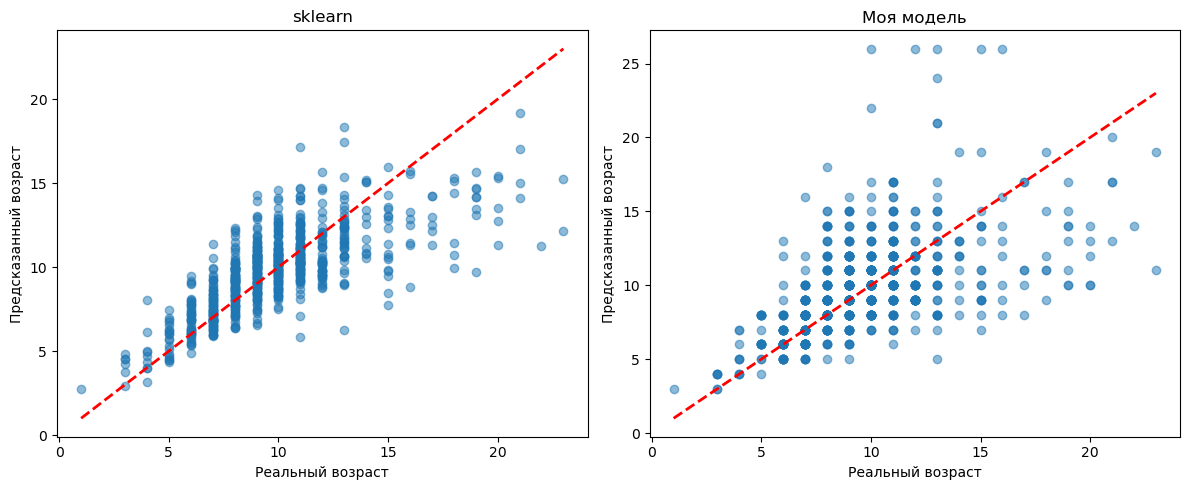

In [121]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test_r, preds_reg_rf, alpha=0.5)
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'r--', lw=2)
plt.xlabel('Реальный возраст')
plt.ylabel('Предсказанный возраст')
plt.title('sklearn')

plt.subplot(1, 2, 2)
plt.scatter(y_test_r, preds_custom_rf_reg, alpha=0.5)
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'r--', lw=2)
plt.xlabel('Реальный возраст')
plt.ylabel('Предсказанный возраст')
plt.title('Моя модель')
plt.tight_layout()
plt.show()

Точки на графике моей модели рассеяны гораздо шире вокруг линии, высокая дисперсия и отсутствие чёткой зависимости между реальным и предсказанным возрастом. Тем не менее, модель работает и выдаёт осмысленные предсказания

**Добавление техники из улучшенного бейзлайна (пункт 3)**

In [134]:
df_r = pd.read_csv('CrabAgePrediction.csv')

le_sex = LabelEncoder()
df_r['Sex_encoded'] = le_sex.fit_transform(df_r['Sex'])
df_r = df_r.drop('Sex', axis=1)

X_r = df_r.drop('Age', axis=1)
y_r = df_r['Age']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_r, y_r, test_size=0.2, random_state=42
)

Я загрузила датасет, закодировала признак Sex, удалила исходный столбец Sex, выделила признаки и целевую переменную Age. Разделила данные на обучающую и тестовую выборки с random_state=42

In [135]:
print("Лучшие параметры:")
print(best_params_reg_rf)
print(f"Лучший CV R2: {best_score_reg_rf:.4f}")

Лучшие параметры:
{'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Лучший CV R2: 0.5582


In [136]:
custom_rf_reg_imp = MyRandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    max_features='log2',
    random_state=42
)
custom_rf_reg_imp.fit(X_train_r, y_train_r)
preds_custom_rf_imp = custom_rf_reg_imp.predict(X_test_r)
mae_custom_imp = mean_absolute_error(y_test_r, preds_custom_rf_imp)
rmse_custom_imp = np.sqrt(mean_squared_error(y_test_r, preds_custom_rf_imp))
r2_custom_imp = r2_score(y_test_r, preds_custom_rf_imp)

Я создала экземпляр моего случайного леса с гиперпараметрами из улучшенного бейзлайна 200 деревьев, максимальная глубина 10, и выбор 'log2' признаков на каждом разбиении. Обучила модель на обучающей выборке и сделала предсказания на тестовой. 'min_samples_leaf': 4, 'min_samples_split': 2 я не задавала, так как это не реализовывала

In [137]:
print(f"Улучшенная модель sklearn:")
print(f"  MAE: {metrics_reg_rf_best['mae']:.4f}, RMSE: {metrics_reg_rf_best['rmse']:.4f}, R2: {metrics_reg_rf_best['r2']:.4f}")
print(f"\nМоя улучшенная модель:")
print(f"  MAE: {mae_custom_imp:.4f}, RMSE: {rmse_custom_imp:.4f}, R2: {r2_custom_imp:.4f}")
print(f"\nРазница:")
print(f"  MAE: {mae_custom_imp - metrics_reg_rf_best['mae']:+.4f}")
print(f"  RMSE: {rmse_custom_imp - metrics_reg_rf_best['rmse']:+.4f}")
print(f"  R2: {r2_custom_imp - metrics_reg_rf_best['r2']:+.4f}")

Улучшенная модель sklearn:
  MAE: 1.4879, RMSE: 2.1111, R2: 0.5362

Моя улучшенная модель:
  MAE: 2.0744, RMSE: 3.0624, R2: 0.0241

Разница:
  MAE: +0.5865
  RMSE: +0.9513
  R2: -0.5122


Моя реализация случайного леса для регрессии показала низкое качество по сравнению с улучшенной моделью из библиотеки sklearn. R2 = 0.0241, в то время как у sklearn = 0.5362, разница в -0.5122. Моя модель практически не объясняет дисперсию возраста крабов и работает хуже, чем простое предсказание среднего значения. MAE = 2.0744 и RMSE = 3.0624 также значительно выше, чем у эталонной модели 1.4879 и 2.1111 соответственно, в среднем моя модель ошибается более чем на 2 месяца, а на крупных ошибках ещё больше.

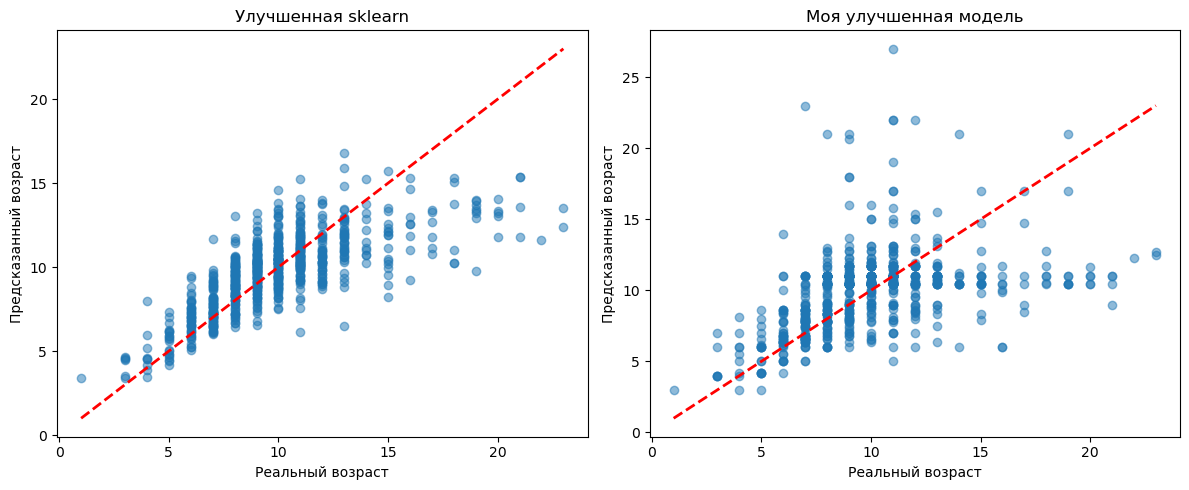

In [138]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test_r, preds_reg_rf_best, alpha=0.5)
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'r--', lw=2)
plt.xlabel('Реальный возраст')
plt.ylabel('Предсказанный возраст')
plt.title('Улучшенная sklearn')

plt.subplot(1, 2, 2)
plt.scatter(y_test_r, preds_custom_rf_imp, alpha=0.5)
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'r--', lw=2)
plt.xlabel('Реальный возраст')
plt.ylabel('Предсказанный возраст')
plt.title('Моя улучшенная модель')
plt.tight_layout()
plt.show()

Хочу поробовать перебрать параметры в цикле для моей реализации, может это даст прирост accuracy

In [132]:
best_r2 = -np.inf
best_params = None
best_mae = None
best_rmse = None

for n_est in [10, 20, 30, 40]:
    for max_d in [5, 10]:
        for max_f in ['sqrt', 'log2']:
            print(f"n_estimators={n_est}, max_depth={max_d}, max_features={max_f}")
            model = MyRandomForestRegressor(
                n_estimators=n_est,
                max_depth=max_d,
                max_features=max_f,
                random_state=42
            )
            model.fit(X_train_r, y_train_r)
            preds = model.predict(X_test_r)
            mae = mean_absolute_error(y_test_r, preds)
            rmse = np.sqrt(mean_squared_error(y_test_r, preds))
            r2 = r2_score(y_test_r, preds)
            if r2 > best_r2:
                best_r2 = r2
                best_mae = mae
                best_rmse = rmse
                best_params = {
                    'n_estimators': n_est,
                    'max_depth': max_d,
                    'max_features': max_f
                }

n_estimators=10, max_depth=5, max_features=sqrt
n_estimators=10, max_depth=5, max_features=log2
n_estimators=10, max_depth=10, max_features=sqrt
n_estimators=10, max_depth=10, max_features=log2
n_estimators=20, max_depth=5, max_features=sqrt
n_estimators=20, max_depth=5, max_features=log2
n_estimators=20, max_depth=10, max_features=sqrt
n_estimators=20, max_depth=10, max_features=log2
n_estimators=30, max_depth=5, max_features=sqrt
n_estimators=30, max_depth=5, max_features=log2
n_estimators=30, max_depth=10, max_features=sqrt
n_estimators=30, max_depth=10, max_features=log2
n_estimators=40, max_depth=5, max_features=sqrt
n_estimators=40, max_depth=5, max_features=log2
n_estimators=40, max_depth=10, max_features=sqrt
n_estimators=40, max_depth=10, max_features=log2


In [140]:
print("Лучшие параметры:")
print(best_params)
print(f"\nЛучшие метрики на тесте:")
print(f"  MAE: {best_mae:.4f}")
print(f"  RMSE: {best_rmse:.4f}")
print(f"  R2: {best_r2:.4f}")

Лучшие параметры:
{'n_estimators': 30, 'max_depth': 5, 'max_features': 'sqrt'}

Лучшие метрики на тесте:
  MAE: 1.6983
  RMSE: 2.4382
  R2: 0.3814


Моя реализация случайного леса для регрессии с подбором гиперпараметров показала качество немного лучше. Метрики значительно лучше, чем у базовой собственной модели без ограничений R2 = 0.0777, ручной подбор гиперпараметров действительно помог улучшить обобщающую способность. Но результат всё ещё уступает улучшенной модели из sklearn MAE = 1.4879, R2 = 0.5362. Тем не менее, факт, что R2 вырос с 0.07 до 0.38, подтверждает, что ограничение глубины max_depth=5 и подбор числа деревьев действительно борются с переобучением и делают модель более стабильной.